## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Create X y dataset
X, y, coef = make_regression(n_samples = 100, n_features = 1,  
                                         n_targets = 1, noise = 25, coef = True)


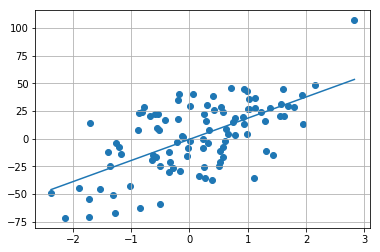

In [3]:
# Plot data

plt.scatter(X, y)
plt.plot(np.unique(X.flatten()), np.poly1d(np.polyfit(X.flatten(), y, 1))(np.unique(X.flatten())))
plt.grid(True)
plt.show()

In [4]:
# Create a dataframe of the features and add the target
df = pd.DataFrame(X)
df.columns = ['X']
df['y'] = y
print('Dataframe Head')
print(df.head())

Dataframe Head
          X          y
0  1.134242  37.170422
1 -0.844911 -62.177751
2 -0.425838  16.467747
3  0.658186   4.054994
4  0.007670  29.688299


In [5]:
# df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
X    100 non-null float64
y    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


In [6]:
# Print descriptive stats
print(df.describe())

                X           y
count  100.000000  100.000000
mean     0.132311    1.953038
std      1.039507   31.556042
min     -2.374125  -71.500502
25%     -0.562485  -17.582145
50%      0.240522    6.071140
75%      0.927874   24.480195
max      2.831316  106.940026


In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X.ravel(), y.ravel())
print('slope: ', slope)
print('intercept: ', intercept)
print('r_value: ', r_value)
print('r_squared: ', r_value**2)
print('p_value: ', p_value)
print ('std_err: ', std_err)

slope:  19.1026633628
intercept:  -0.574461766882
r_value:  0.629272807932
r_squared:  0.395984266802
p_value:  2.35152977701e-12
std_err:  2.38323048023


In [8]:
# Create model
# http://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

model = ols("y ~ X", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     64.25
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           2.35e-12
Time:                        18:24:52   Log-Likelihood:                -461.36
No. Observations:                 100   AIC:                             926.7
Df Residuals:                      98   BIC:                             931.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5745      2.485     -0.231      0.818      -5.506       4.357
X             19.1027      2.383      8.015      0.000      14.373      23.832
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.373
Skew:                          -0.025   Prob(JB):                        0.503
Kurtosis:                       2.428   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

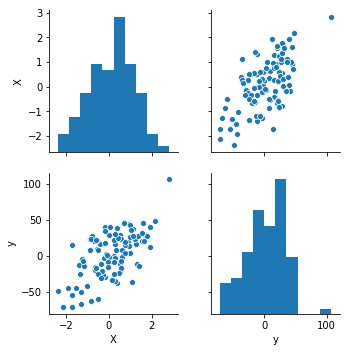

In [9]:
# Seaborh pairplog
sns.pairplot(df)

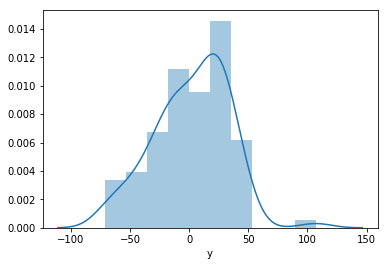

In [10]:
# Distribution plot
sns.distplot(df['y'])

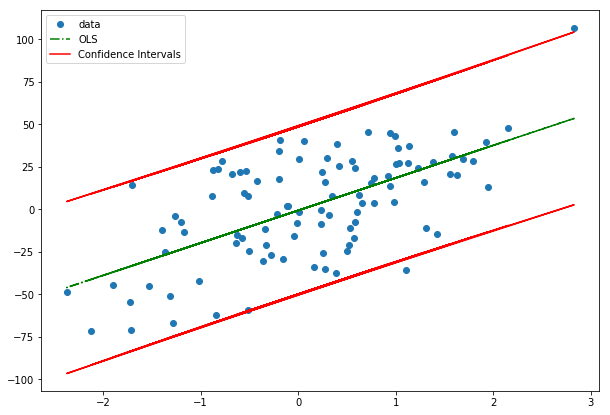

In [11]:
# Retrieve our confidence interval values with wls_prediction_std
# https://www.statsmodels.org/dev/examples/notebooks/generated/wls.html

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# Plot data
ax.plot(X, y, 'o', label='data')

# Plot trend line
ax.plot(X, model.fittedvalues, 'g-.', label='OLS')

# Plot confidence interval
ax.plot(X, confidence_interval_upper, 'r-', label='Confidence Intervals')
ax.plot(X, confidence_interval_lower, 'r-')

# Plot legend
ax.legend(loc='best');

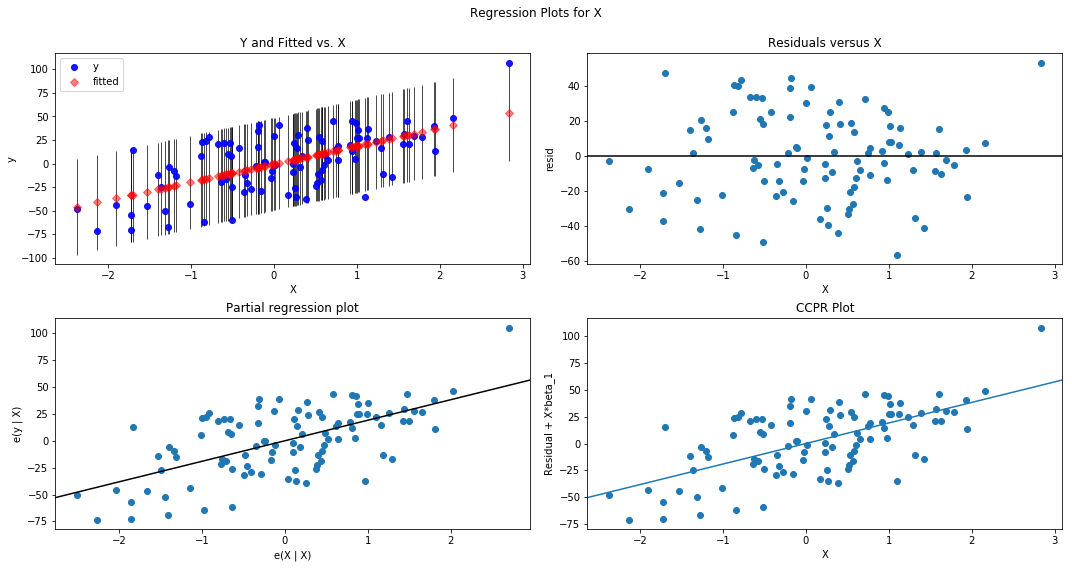

In [12]:
# Regression plots
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "X", fig=fig)

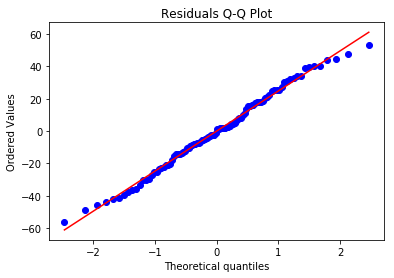

In [13]:
# Probability Plot
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")
plt.show()

In [14]:
# https://pythonfordatascience.org/linear-regression-python/
# Assumption of multicollinearity
print(df.corr())

          X         y
X  1.000000  0.629273
y  0.629273  1.000000


In [15]:
# Assumption of independent errors
print(statsmodels.stats.stattools.durbin_watson(model.resid))

2.06287714787


In [16]:
# Assumption of normality of the residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(lzip(name, test))

[('Jarque-Bera', 1.3734816675086967), ('Chi^2 two-tail prob.', 0.50321345566817244), ('Skew', -0.02505515325762309), ('Kurtosis', 2.4280519626897603)]


In [17]:
# Assumption of homoscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 1.2712008147489406), ('p-value', 0.25954152871266661), ('f-value', 1.2618170267790128), ('f p-value', 0.26405171566561625)]



Values for the line equation from the first several iterations of the gradient descent
Iteration 0: y = 0.1953 + 2.0694x and the cost: 454.0157
Iteration 6: y = 0.6159 + 10.5007x and the cost: 337.3065
Iteration 12: y = 0.4540 + 14.7219x and the cost: 308.0929
Iteration 18: y = 0.1745 + 16.8523x and the cost: 300.5376
Iteration 24: y = -0.0721 + 17.9366x and the cost: 298.5150

Via formula: y = -0.5745 + 19.1027x


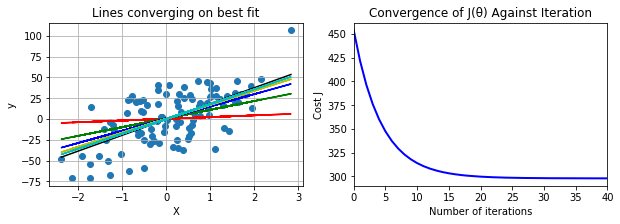

In [18]:
def cost_function(X, y, theta):

    return ((X.dot(theta) - np.vstack(y.T)) ** 2).sum()/(2 * y.size)

def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize values
    J_history = np.zeros((num_iters, 1))
    colors = ['r', 'g', 'b', 'y', 'c']
    j = 0
    print()
    print('Values for the line equation from the first several iterations of the gradient descent')

    for i in range(num_iters):       
        # beta = beta - alpha * (X.T.dot(X.dot(beta)-y)/m)
        theta = theta - alpha*(1.0/m) * X.T.dot(X.dot(theta) - np.vstack(y.T))

        # cost history    
        J_history[i] = cost_function(X, y, theta)
        
        if i < 30 and i % 6 == 0:
            # Show some thetas and costs in the line equation as it approaches best fit
            # Assuming convergence is before 30 iterations
            print ('Iteration {}: y = {:0.4f} + {:0.4f}x and the cost: {:0.4f}'.format(i, theta[0][0], theta[1][0], J_history[i][0]))
            plt.plot(Xcopy, theta[0][0] + theta[1][0] * Xcopy, '-', c=colors[j])
            j += 1

    return theta, J_history

# Andrew Ng's M&Ns
m, n = X.shape # observations, features

# Save original X
Xcopy = X.copy()
Xcopy = Xcopy.flatten()

# Reshape X and add bias
X = np.append(arr = np.ones((y.size, 1)).astype(int), values = X.reshape(y.size, 1), axis = 1)

# Plot equation lines based on gradient descent
plt.figure(figsize=(10,3))

plt.subplot(121)

# Plot data 
# y = 0.1383 + 0.7234x
plt.scatter(Xcopy, y)

# plt.plot(Xcopy, a1 + b1 * Xcopy, 'r-', linewidth=3)
plt.plot(np.unique(Xcopy), np.poly1d(np.polyfit(Xcopy, y, 1))(np.unique(Xcopy)), 'k-')

plt.grid(True)
plt.title('Lines converging on best fit')
plt.xlabel('X')
plt.ylabel('y')

# Choose a learning rate
alpha = 0.1
num_iters = 1000

# Init weights and run gradient descent 
# theta = np.zeros((X.shape[1], 1)) 
theta=[[0], [0]]
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Get slope and intercept
# denominator = y.size * sum(map(lambda x:x*x,X)) - X.sum()**2
# a = ((y.sum() * X.dot(X)) - (X.sum() * sum(X * y))) / denominator
# b = ((y.size * sum(X * y)) - (X.sum() * y.sum())) / denominator
# print()
# print ('y = {:0.4f} + {:0.4f}x'.format(a, b))

# Similar method to get slope and intercept
d = Xcopy.dot(Xcopy) - Xcopy.mean() * Xcopy.sum()
a1 = ( y.mean() * Xcopy.dot(Xcopy) - Xcopy.mean() * Xcopy.dot(y) ) / d
b1 = ( Xcopy.dot(y) - y.mean() * Xcopy.sum() ) / d
print()
print ('Via formula: y = {:0.4f} + {:0.4f}x'.format(a1, b1))

plt.subplot(122)

# Plot the graph
plt.plot(range(J_history.size), J_history, "-b", linewidth=2 )
plt.title('Convergence of J(\u03B8) Against Iteration')
# r'J($\theta$)'
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.xlim((0, 40))
plt.show(block=False)

In [19]:
# print()
# print('Theta via Make Regression Function')
# print(pd.DataFrame(coef, columns=['True Coefficient Values']))
# print()
print('Cost and theta values')
print(J_history[-1][0])
print(theta.flatten())

Cost and theta values
297.727183706
[ -0.57446177  19.10266336]


Intercept:  -1.36894754312
Coefficients:  20.2752792266
Mean squared error: 559.94
Root mean squared error: 23.66
Mean absolute error: 17.15
Variance score: 0.15


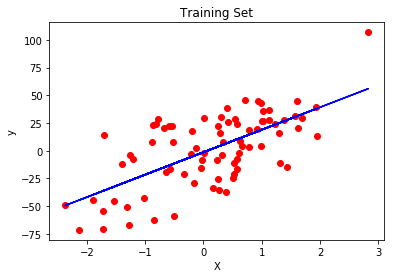

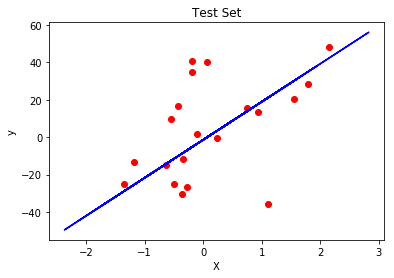

In [20]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xcopy.reshape(y.size,1), y, test_size = 1/5, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# The intercept coefficient
# https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_[0])
# The mean squared error mse
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error rmse
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error mae
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

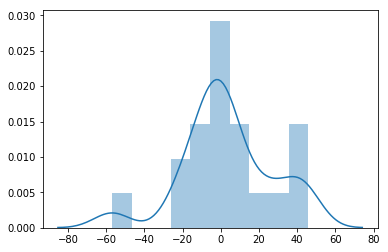

In [21]:
# Plot of residuals
sns.distplot((y_test-y_pred),bins=10);